In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq

using StaticArrays

In [2]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
tspan = (0.0, 100000.0)

condition1 = SA[0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
condition2 = SA[0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
a = 1.
b = 3.
c = 1.
d = 5.
xr = -1.6
r = 0.01
s = 5.
I = 4.
xv = 2.

k1= -0.17
k2 = k1
k = 1.0

p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]

12-element SArray{Tuple{12}, Float64, 1, 12} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  1.0

In [5]:
ds = ContinuousDynamicalSystem(HR, condition1, p )

6-dimensional continuous dynamical system
 state:       [0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 1.0]

In [6]:
fp, eigs, stable = fixedpoints(ds, box)

(6-dimensional Dataset{Float64} with 1 points, Vector{ComplexF64}[[-8.951148537373278 + 0.0im, -7.2685720091863 + 0.0im, -0.04356827411227428 - 0.06640310594655666im, -0.04356827411227428 + 0.06640310594655666im, 0.043637659307650824 + 0.0im, 0.1171405810457494 + 0.0im]], Bool[0])

In [7]:
eigs[1]

6-element Vector{ComplexF64}:
   -8.951148537373278 + 0.0im
     -7.2685720091863 + 0.0im
 -0.04356827411227428 - 0.06640310594655666im
 -0.04356827411227428 + 0.06640310594655666im
 0.043637659307650824 + 0.0im
   0.1171405810457494 + 0.0im

In [4]:
function circleShape(h, k, r)
     θ = LinRange(0, 2*π, 500)
     h .+ r*sin.(θ), k .+ r*cos.(θ)
end

circleShape (generic function with 1 method)

In [64]:
COLORS = [
    "black",
     "red",
    "orange",
    "yellow",
    "lime",
    "green"
]

6-element Vector{String}:
 "black"
 "red"
 "orange"
 "yellow"
 "lime"
 "green"

In [76]:
kvalues = range(1.0, 0.0, length = 20)

x1 = y1 = z1 = x2 = y2 = z3 = -15..15
box = x1 × y1 × z1 × x2 × y2 × z3
using CairoMakie


In [79]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"Re", ylabel = L"Im")

vlines!(0.0, lw = 0.5, linestyle = :dash)

for (index_k, k) in enumerate(kvalues)
    
    println("k: ", k); flush(stdout)
    println("index: ", index_k); flush(stdout)
    p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]
    ds = ContinuousDynamicalSystem(HR, condition1, p )
    
    x1 = y1 = z1 = x2 = y2 = z3 = -10..10
    box = x1 × y1 × z1 × x2 × y2 × z3
    
    fp, eigs, stable = fixedpoints(ds, box)
    eigins = eigs[1]
    
    println("fixed  points: ", fp); flush(stdout)
    println("eigs: ", eigins); flush(stdout)
    
    for (index_eig, eig) in enumerate(eigins)
        
        re = eig.re
        im = eig.im
        
        if index_eig >= 3
         scatter!(ax, re, im, color = "blue", markersize = 4.0 ) # COLORS[index_eig]
        end
    end
    println(">>>>>>>>>>>>>>>>>"); flush(stdout)
    println("")
end

k: 1.0
index: 1
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigs: ComplexF64[-8.951148537373275 + 0.0im, -7.268572009186295 + 0.0im, -0.043568274112274374 - 0.06640310594655657im, -0.043568274112274374 + 0.06640310594655657im, 0.04363765930765069 + 0.0im, 0.11714058104574915 + 0.0im]
>>>>>>>>>>>>>>>>>

k: 0.9473684210526315
index: 2
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigs: ComplexF64[-8.856956502205549 + 0.0im, -7.268572009186301 + 0.0im, -0.03803271274876805 - 0.0693491998096832im, -0.03803271274876805 + 0.0693491998096832im, 0.04363765930765206 + 0.0im, 0.1171405810457472 + 0.0im]
>>>>>>>>>>>>>>>>>

k: 0.8947368421052632
index: 3
fixed  points: 6-dimensional Dataset{Float64} with 1 points
eigs: ComplexF64[-8.763004101236769 + 0.0im, -7.268572009186306 + 0.0im, -0.03237733428579022 - 0.07179454150968943im, -0.03237733428579022 + 0.07179454150968943im, 0.04363765930765166 + 0.0im, 0.11714058104574816 + 0.0im]
>>>>>>>>>>>>>>>>>

k: 0.842105263157

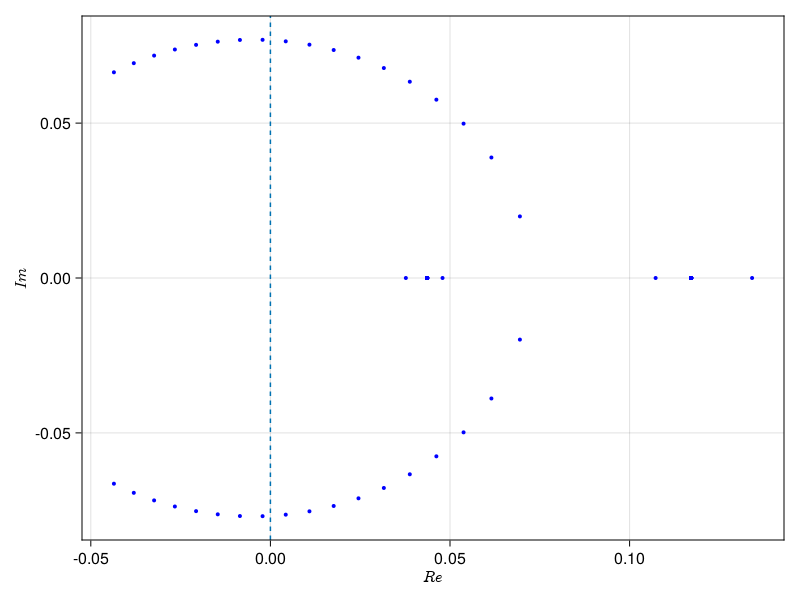

In [80]:
fig

## k = 0.0

In [53]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [54]:
eigs[1]

6-element Vector{ComplexF64}:
    -7.2685720091863 + 0.0im
  -7.210096522033617 + 0.0im
 0.03770821879322181 + 0.0im
 0.04363765930765034 + 0.0im
  0.1171405810457492 + 0.0im
  0.1341032176425762 + 0.0im

## k = 0.5

In [59]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [60]:
eigs[1]

6-element Vector{ComplexF64}:
   -8.066732749238547 + 0.0im
   -7.268572009186302 + 0.0im
 0.014223831820364656 - 0.0745461985531838im
 0.014223831820364656 + 0.0745461985531838im
  0.04363765930765022 + 0.0im
  0.11714058104574947 + 0.0im

## k = 0.133

In [71]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [72]:
eigs[1]

6-element Vector{ComplexF64}:
  -7.434795995137219 + 0.0im
  -7.268572009186299 + 0.0im
 0.04363765930765188 + 0.0im
 0.06525545476970074 - 0.0316775372851849im
 0.06525545476970074 + 0.0316775372851849im
 0.11714058104574744 + 0.0im

## k = 0.134

In [77]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [78]:
eigs[1]

6-element Vector{ComplexF64}:
  -7.436494748587782 + 0.0im
  -7.268572009186302 + 0.0im
 0.04363765930765181 + 0.0im
 0.06510483149497995 - 0.032009203936183644im
 0.06510483149497995 + 0.032009203936183644im
 0.11714058104574716 + 0.0im

## k = 1.0

In [83]:
fp

6-dimensional Dataset{Float64} with 1 points
 -0.738229  -1.72491  4.30886  -0.738229  -1.72491  4.30886

In [84]:
eigs[1]

6-element Vector{ComplexF64}:
   -8.951148537373278 + 0.0im
     -7.2685720091863 + 0.0im
 -0.04356827411227428 - 0.06640310594655666im
 -0.04356827411227428 + 0.06640310594655666im
 0.043637659307650824 + 0.0im
   0.1171405810457494 + 0.0im